In [ ]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [ ]:
Univ = pd.read_csv("Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [ ]:
Univ.Univ.nunique()

25

In [ ]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.loc[:,"SAT":"GradRate"])

# Normalized data frame (considering the numerical part of data)
#df_norm = norm_func(Univ.iloc[:,1:])



In [ ]:
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


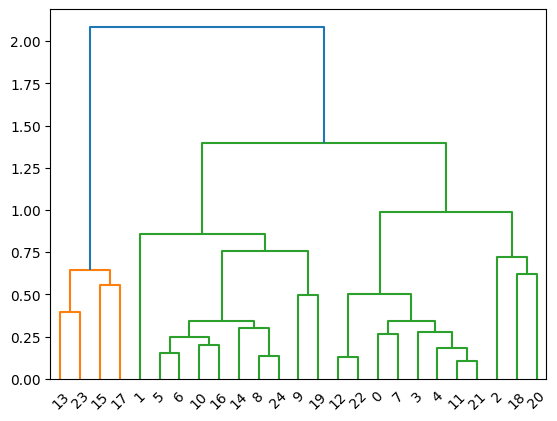

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))
#average,single,complete,centroid, ward

In [ ]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4,linkage = 'average',metric='euclidean')

In [ ]:
help(hc)

Help on AgglomerativeClustering in module sklearn.cluster._agglomerative object:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, metric='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
 |
 |  Agglomerative Clustering.
 |
 |  Recursively merges pair of clusters of sample data; uses linkage distance.
 |
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |
 |  metric : str or callable, default="euclidean"
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or "precomputed". If linkage is "ward", only
 |      "euclidean" is accepted. If "precomputed", a distance matrix is

In [ ]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [ ]:
Clusters

,Clusters
0,3
1,2
2,0
3,3
4,3
5,3
6,3
7,3
8,3
9,2


In [ ]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster_id
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,3
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [ ]:
Univ['cluster_id']=hc.labels_

In [ ]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster_id
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,3
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [ ]:
Univ=pd.read_csv("Universities.csv",index_col=0)
Univ.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Univ,,,,,,
Brown,1310,89,22,13,22704,94
CalTech,1415,100,25,6,63575,81
CMU,1260,62,59,9,25026,72
Columbia,1310,76,24,12,31510,88
Cornell,1280,83,33,13,21864,90


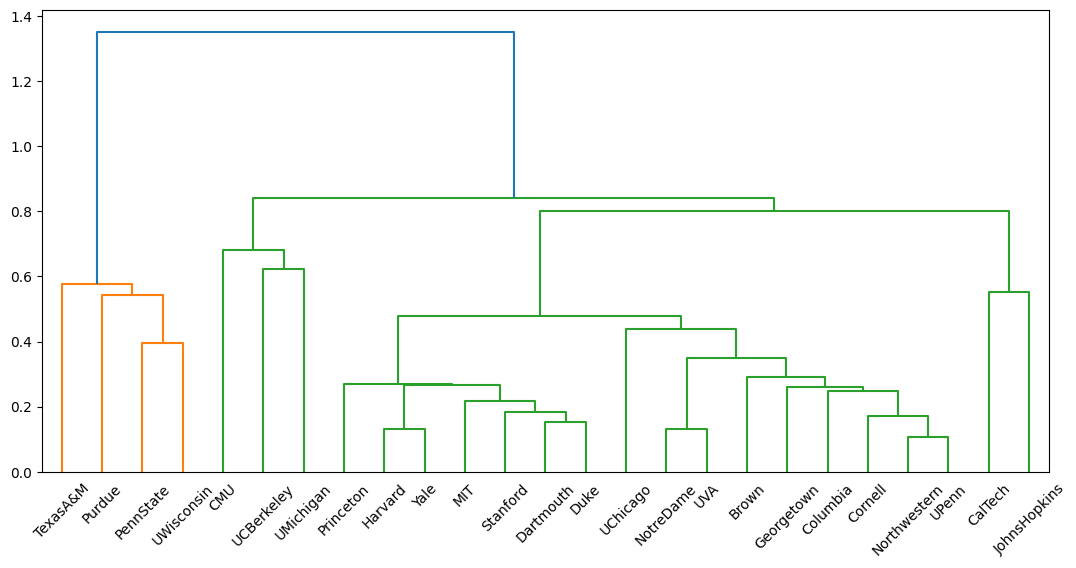

In [ ]:
fig=plt.figure(figsize=(13,6))
dendrogram = sch.dendrogram(sch.linkage(norm_func(Univ), method='average'),labels=Univ.index)